In [125]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [126]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [127]:
delhi=pd.read_csv("../cities/Delhi.csv")

In [128]:
delhi.head(10)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,15800000,1800,Sector 7 Dwarka,4,1,0,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
6,15400000,1500,Sector 6 Dwarka,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,13500000,1800,Sector 5 Dwarka,3,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,6500000,1000,Sector 23 Rohini,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,12500000,1300,Mayur Vihar II,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
print(delhi.columns)

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')


In [130]:
delhi.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,4.998000e+03,4998.000000,4998.000000,4998.00000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,1.588638e+07,1277.343737,2.657863,0.80012,5.423770,5.472589,5.415966,5.435574,5.412765,5.437975,...,5.655662,5.416367,5.456783,5.413165,5.394958,5.415566,5.408764,5.412965,5.394958,5.411565
std,4.612894e+07,915.217800,0.820605,0.39995,4.378355,4.322819,4.387116,4.365041,4.390702,4.362324,...,4.102704,4.386668,4.340938,4.390254,4.410549,4.387565,4.395176,4.390478,4.410549,4.392045
min,2.000000e+06,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.900000e+06,800.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.500000e+06,1000.000000,3.000000,1.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.580000e+07,1650.000000,3.000000,1.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,8.546000e+08,16000.000000,8.000000,1.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [131]:
delhi.rename(columns={"No. of Bedrooms":"Bedrooms", "24X7Security":"Security","Children'splayarea":"Playarea"}, inplace=True)

In [132]:
y1=np.log(delhi["Price"])

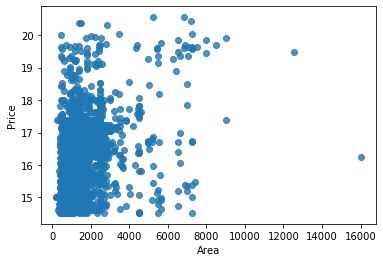

In [133]:
sns.regplot(x="Area",y=y1,data=delhi,fit_reg=False)

here we see, that when area>8000 there aren't many options,and hence they are outliers.

In [134]:
delhi.drop(delhi[delhi["Area"]>=8000].index,inplace=True)


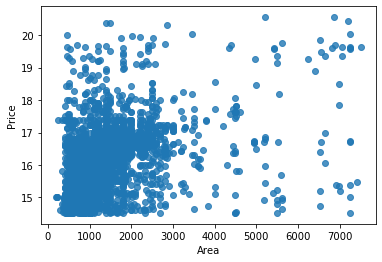

In [135]:
y1=np.log(delhi["Price"])
sns.regplot(x="Area",y=y1,data=delhi,fit_reg=False)

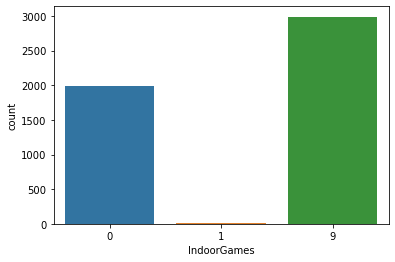

In [136]:
sns.countplot(x=delhi["IndoorGames"],data=delhi)

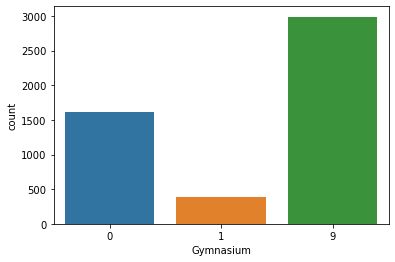

In [137]:
sns.countplot(x=delhi["Gymnasium"],data=delhi)

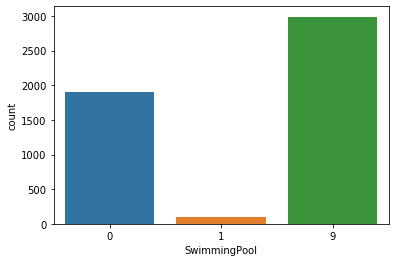

In [138]:
sns.countplot(x="SwimmingPool",data=delhi)

Similarly for other aminities we can see that the number of not mentioned are very large. This will not help us in predicting the accurate price of the property. So we will remove all the rows containing not mentioned or 9

In [139]:
delhi.replace(9,np.nan,inplace=True)
delhi.dropna(axis=0,how="any",inplace=True)

In [140]:
le_location=LabelEncoder()
delhi["Location"]=le_location.fit_transform(delhi["Location"])


x1=delhi.drop(["Price","MaintenanceStaff","SwimmingPool","LandscapedGardens","ShoppingMall","SportsFacility","ATM","ClubHouse","StaffQuarter","Cafeteria","MultipurposeRoom","WashingMachine","Wifi","BED","Microwave","DiningTable","Wardrobe","Sofa","Refrigerator","GolfCourse","TV"],axis=1,inplace=False)
x1=sm.add_constant(x1)
y1=np.log(delhi["Price"])
model=sm.OLS(y1,x1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     538.4
Date:                Sun, 14 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:46:12   Log-Likelihood:                -583.76
No. Observations:                2002   AIC:                             1208.
Df Residuals:                    1982   BIC:                             1320.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.3230    

/home/dev4901/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


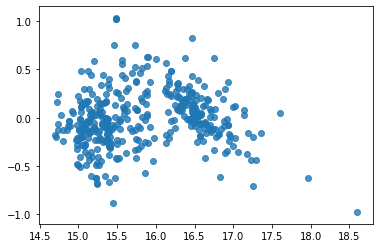

In [141]:
delhi.drop(["MaintenanceStaff","SwimmingPool","LandscapedGardens","ShoppingMall","SportsFacility","ATM","ClubHouse","StaffQuarter","Cafeteria","MultipurposeRoom","WashingMachine","Wifi","BED","Microwave","DiningTable","Wardrobe","Sofa","Refrigerator","GolfCourse","TV"],axis=1,inplace=True)

x=delhi.drop("Price",axis=1,inplace=False)
x=x.values
y=np.log(delhi["Price"]).values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
lgr=LinearRegression(fit_intercept=True)
model_1=lgr.fit(x_train,y_train)
prediction=lgr.predict(x_test)
residual=y_test-prediction
sns.regplot(prediction,residual,fit_reg=False)

In [142]:
print(model_1.score(x_test,y_test))

0.8576641158515688


In [143]:
print(r2_score(y_test,prediction))

0.8576641158515688


In [144]:
print(np.sqrt(mean_squared_error(y_test,prediction)))

0.291147935425969
